In [1]:
!pip install ../../../oceans_sf
import warnings

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
import seaborn as sns
import xarray as xr

import oceans_sf as ocsf

sns.set_style(style="white")
sns.set_context("talk")

matplotlib_inline.backend_inline.set_matplotlib_formats("retina")
warnings.filterwarnings("ignore")

Processing /Users/brodiepearson/GitHub/oceans_sf
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for oceans_sf: filename=oceans_sf-0.0.0-py3-none-any.whl size=21295 sha256=80a6b4eb7d487c5784f9143cec324f4d45e8c104f99403c89f5f4f88ec2b3a12
  Stored in directory: /private/var/folders/hw/qnv0wm_x4p7bt8y7tw33cxjh0000gn/T/pip-ephem-wheel-cache-szh68b0m/wheels/e3/68/41/f3613eeb990e8b1c0afca135fa4a096f8b5521ff9c29b52b8f
Successfully built oceans_sf
  Attempting uninstall: oceans_sf
    Found existing installation: oceans_sf 0.0.0
    Uninstalling oceans_sf-0.0.0:
      Successfully uninstalled oceans_sf-0.0.0


In [2]:
ds = xr.load_dataset("example_data/langmuir_fields.nc")
ds = ds.isel(time=1)

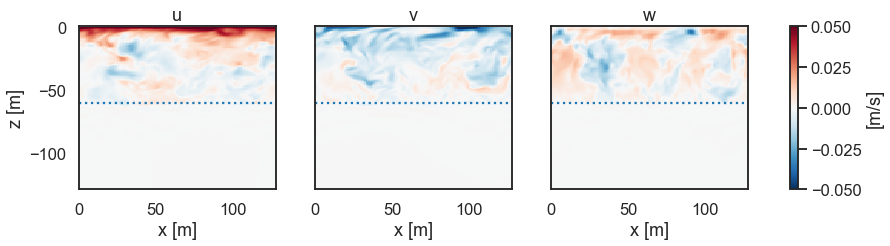

In [21]:
fig, ax = plt.subplots(1,3, figsize=(15,3),sharey=True)

pc1 = ax[0].pcolormesh(ds.xC, ds.zC, ds.u[:,64,:], cmap="RdBu_r",vmin=-0.05,vmax=0.05)
pc2 = ax[1].pcolormesh(ds.xC, ds.zC, ds.v[:,64,:], cmap="RdBu_r",vmin=-0.05,vmax=0.05)
pc3 = ax[2].pcolormesh(ds.xC, ds.zF, ds.w[:,64,:], cmap="RdBu_r",vmin=-0.05,vmax=0.05)


ax[0].plot([0, 128], [-60, -60], ':')
ax[1].plot([0, 128], [-60, -60], ':')
ax[2].plot([0, 128], [-60, -60], ':')


ax[0].set_ylabel("z [m]")
ax[0].set_xlabel("x [m]")
ax[1].set_xlabel("x [m]")
ax[2].set_xlabel("x [m]")

ax[0].set_title("u")
ax[1].set_title("v")
ax[2].set_title("w")

cbar = fig.colorbar(pc1, ax=ax, orientation="vertical",label='[m/s]')

In [4]:
nn = 128

sf = ocsf.generate_structure_functions_3d(
    ds.u.values[-60:,:nn,:], 
    ds.v.values[-60:,:nn,:], 
    ds.w.values[-60:,:nn,:], 
    ds.xF.values[:nn], 
    ds.yF.values[:nn], 
    ds.zF.values[-60:], 
    traditional_type=['LL','LLL','LTT'],
    boundary=["periodic-x", "periodic-y"]
)

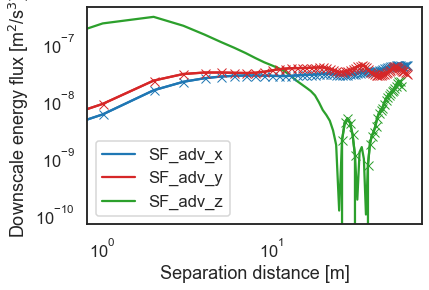

In [5]:
plt.loglog(sf['x-diffs'],abs(sf['SF_advection_velocity_x']/2),color='tab:blue',label='SF_adv_x')
plt.loglog(sf['y-diffs'],abs(sf['SF_advection_velocity_y']/2),color='tab:red',label='SF_adv_y')
plt.loglog(sf['z-diffs'],abs(sf['SF_advection_velocity_z']/2),color='tab:green',label='SF_adv_z')

plt.loglog(sf['x-diffs'],-(sf['SF_advection_velocity_x']/2),color='tab:blue',marker='x')
plt.loglog(sf['y-diffs'],-(sf['SF_advection_velocity_y']/2),color='tab:red',marker='x')
plt.loglog(sf['z-diffs'],-(sf['SF_advection_velocity_z']/2),color='tab:green',marker='x')

plt.xlabel('Separation distance [m]')
plt.ylabel('Downscale energy flux [m$^2$/s$^3$]')
plt.legend();

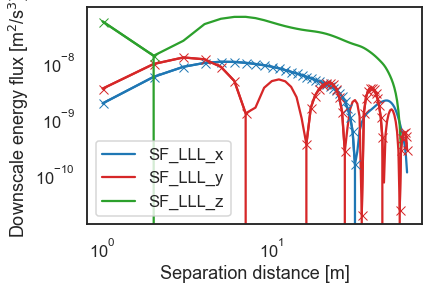

In [6]:
plt.loglog(sf['x-diffs'],abs(-5*sf['SF_LLL_x']/(4*sf['x-diffs'])),color='tab:blue',label='SF_LLL_x')
plt.loglog(sf['y-diffs'],abs(-5*sf['SF_LLL_y']/(4*sf['y-diffs'])),color='tab:red',label='SF_LLL_y')
plt.loglog(sf['z-diffs'],abs(-5*sf['SF_LLL_z']/(4*sf['z-diffs'])),color='tab:green',label='SF_LLL_z')

plt.loglog(sf['x-diffs'],-(-5*sf['SF_LLL_x']/(4*sf['x-diffs'])),color='tab:blue',marker='x')
plt.loglog(sf['y-diffs'],-(-5*sf['SF_LLL_y']/(4*sf['y-diffs'])),color='tab:red',marker='x')
plt.loglog(sf['z-diffs'],-(-5*sf['SF_LLL_z']/(4*sf['z-diffs'])),color='tab:green',marker='x')

plt.xlabel('Separation distance [m]')
plt.ylabel('Downscale energy flux [m$^2$/s$^3$]')
plt.legend();

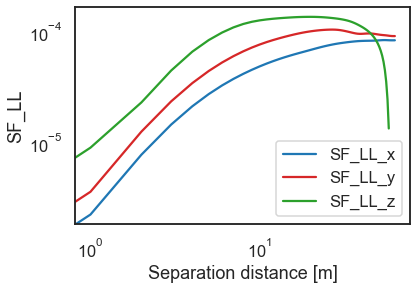

In [7]:
plt.loglog(sf['x-diffs'],sf['SF_LL_x'],label='SF_LL_x',color='tab:blue')
plt.loglog(sf['y-diffs'],sf['SF_LL_y'],label='SF_LL_y',color='tab:red')
plt.loglog(sf['z-diffs'],sf['SF_LL_z'],label='SF_LL_z',color='tab:green')

plt.xlabel('Separation distance [m]')
plt.ylabel('SF_LL')
plt.legend();

In [8]:
sf['z-diffs']

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58.])

In [11]:
sf['SF_LL_z']

array([0.00000000e+00, 9.00215367e-06, 2.29066438e-05, 4.42745403e-05,
       6.53507322e-05, 8.29876521e-05, 9.69998419e-05, 1.07841145e-04,
       1.15733200e-04, 1.21106713e-04, 1.24680218e-04, 1.27128044e-04,
       1.28917295e-04, 1.30285628e-04, 1.31361141e-04, 1.32257087e-04,
       1.32989559e-04, 1.33527319e-04, 1.33860565e-04, 1.34042734e-04,
       1.34104618e-04, 1.34012975e-04, 1.33755029e-04, 1.33361488e-04,
       1.32852360e-04, 1.32224887e-04, 1.31505291e-04, 1.30728512e-04,
       1.29909940e-04, 1.29023832e-04, 1.28025799e-04, 1.26910483e-04,
       1.25669145e-04, 1.24255988e-04, 1.22636816e-04, 1.20802036e-04,
       1.18767612e-04, 1.16580063e-04, 1.14287191e-04, 1.11938187e-04,
       1.09563239e-04, 1.07141609e-04, 1.04621574e-04, 1.01973890e-04,
       9.91847722e-05, 9.62154276e-05, 9.30105831e-05, 8.95145299e-05,
       8.56965547e-05, 8.15321370e-05, 7.69861097e-05, 7.20001096e-05,
       6.64694437e-05, 6.02244386e-05, 5.30351375e-05, 4.46901749e-05,
      

In [19]:
ds.w[-6:,:,0]

<xarray.DataArray 'w' (zF: 6, yC: 128)>
array([[ 1.82860763e-02,  1.62971004e-02,  1.30092499e-02,
         1.17007081e-02,  1.16718501e-02,  1.18459303e-02,
         1.13186524e-02,  9.91126530e-03,  7.27594319e-03,
         1.97679680e-03, -5.29109314e-03, -8.85329944e-03,
        -8.16738260e-03, -5.97312987e-03, -4.31520455e-03,
        -4.22544129e-03, -3.87333767e-03, -1.79336532e-05,
         7.67581835e-03,  1.04162774e-02,  1.38945071e-02,
         8.66948033e-03, -1.21866474e-03, -1.09299332e-02,
        -1.45983920e-02, -1.04883433e-02, -7.10633112e-03,
        -8.53014117e-03, -6.45572144e-03, -5.77018915e-03,
        -1.50917130e-02, -1.29553786e-02, -4.67927576e-03,
         2.10025102e-04,  3.49809330e-03,  9.49908293e-03,
         1.32760375e-02,  1.23467436e-02,  9.34405866e-03,
         7.04914928e-03,  7.62146843e-03,  9.40246645e-03,
         1.10748233e-02,  1.18080008e-02,  1.12247431e-02,
         9.21741101e-03,  6.39818434e-03,  3.94563093e-03,
         1.92780708e-03,  3.52638926e-04, -6.81170760e-04,
        -5.31418422e-04,  6.17162349e-04,  2.52868293e-03,
         4.39776033e-03,  5.52538355e-03,  5.78583045e-03,
         4.77829347e-03,  3.18391841e-03,  1.97779304e-03,
...
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00]])
Coordinates:
  * zF       (zF) float64 -5.0 -4.0 -3.0 -2.0 -1.0 0.0
    xC       float64 0.5
  * yC       (yC) float64 0.5 1.5 2.5 3.5 4.5 ... 123.5 124.5 125.5 126.5 127.5
    time     timedelta64[ns] 04:00:00
Attributes:
    units:      m/s
    long_name:  Velocity in the z-direction

(-0.05, 0.05)

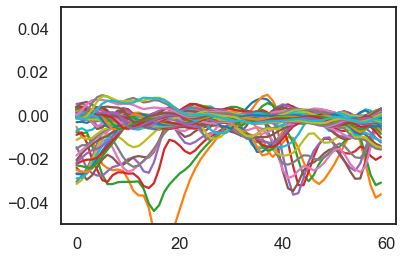

In [50]:
for z_values in range(ds.v.values[-60:,:,64].shape[0]):
    plt.plot(ds.v.values[-z_values,:60,64])
    
plt.ylim(-0.05, 0.05)

(-0.05, 0.05)

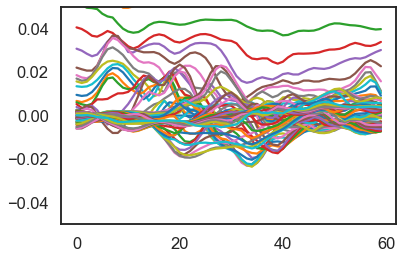

In [46]:
for z_values in range(ds.u.values[-60:,64,:].shape[0]):
    plt.plot(ds.u.values[-z_values,64,:60])
    
plt.ylim(-0.05, 0.05)

(-0.05, 0.05)

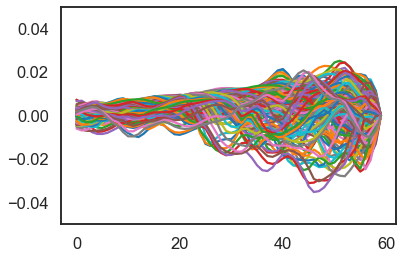

In [45]:
for y_values in range(ds.w.values[-60:,:,64].shape[1]):
    plt.plot(ds.w.values[-60:,y_values,64])
    
plt.ylim(-0.05, 0.05)